# Доверительный интервал

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
norm_rv = stats.norm(loc=0, scale=1)
norm_rv.ppf(0.025) # 1.96 это квантиль уровня 2.5 %

-1.9599639845400545

In [3]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=3):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """

    plt.figure(figsize=(5,3))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=9)
    plt.xlabel('$x$', fontsize=9)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=9)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

(-1.959963984540054, 1.959963984540054)

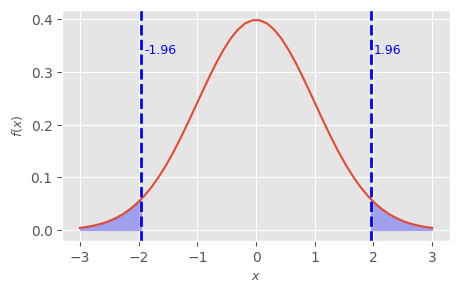

In [4]:
alpha = 0.05
norm_conf_int(alpha)

#### Вариант 1

In [5]:
# Число просмотров течение недели
x = [5, 7, 8, 2, 3, 1, 2]

In [6]:
# Оценка методом моментов
norm_rv = stats.norm(loc=0, scale=1)

alpha = 0.05
z_alpha = norm_rv.ppf(1 - alpha/2)

mean = np.mean(x)
se = np.sqrt(mean/len(x))

left = mean - z_alpha*se
right = mean + z_alpha*se

print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины { right - left:.3}")

Доверительный интервал [2.52, 5.48] ширины 2.96


In [7]:
# По аналогии можно построить асимптотический доверительный интервал с помощью уже готовой функции.
mean = np.mean(x)
se = np.sqrt(mean/len(x))

stats.norm.interval(0.95, loc=mean, scale=se)

(2.518406490932507, 5.481593509067493)

(2.518406490932507, 5.481593509067493)

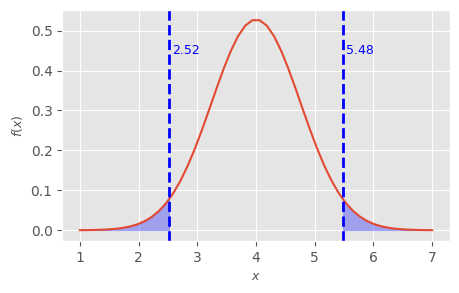

In [8]:
norm_conf_int(alpha, mean_hat=mean, std_hat=se)

#### Вариант 2

In [9]:
# Число просмотров течение недели
x = [5, 7, 8, 2, 3, 1, 2]
y = [1, 1, 9, 1, 2, 2, 2]

In [10]:
alpha = 0.05

z_alpha = norm_rv.ppf(1 - alpha/2)

diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se


print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [-0.47, 3.33] ширины 3.8


(-0.47044607117023984, 3.3275889283130966)

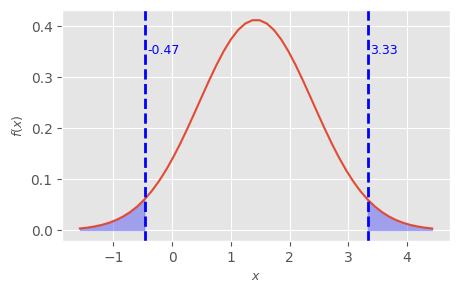

In [11]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)

#### Вариант 3

In [12]:
data = {'first_visit':['2016-08-05','2016-08-11','2016-08-16','2016-08-20','2016-08-22'],
        'success':[108,103,102,35,92],
        'total':[2492,2413,2543,1532,2234]}

In [13]:
df = pd.DataFrame(data=data)
df['first_visit'] = pd.to_datetime(df['first_visit'])
df = df.set_index('first_visit')
df['retention'] = df['success']/df['total']

In [14]:
df.head()

,success,total,retention
first_visit,,,
2016-08-05,108,2492,0.043339
2016-08-11,103,2413,0.042685
2016-08-16,102,2543,0.040110
2016-08-20,35,1532,0.022846
2016-08-22,92,2234,0.041182


In [15]:
alpha = 0.05

df['se'] = np.sqrt(df['retention'] * (1 - df['retention']) / df['total'])

q = stats.norm.ppf(1 - alpha/2)
df['left'] = df['retention'] - q * df['se']
df['right'] = df['retention'] + q * df['se']

df.head()

,success,total,retention,se,left,right
first_visit,,,,,,
2016-08-05,108,2492,0.043339,0.004079,0.035344,0.051333
2016-08-11,103,2413,0.042685,0.004115,0.034620,0.050751
2016-08-16,102,2543,0.040110,0.003891,0.032484,0.047736
2016-08-20,35,1532,0.022846,0.003817,0.015364,0.030328
2016-08-22,92,2234,0.041182,0.004204,0.032942,0.049422


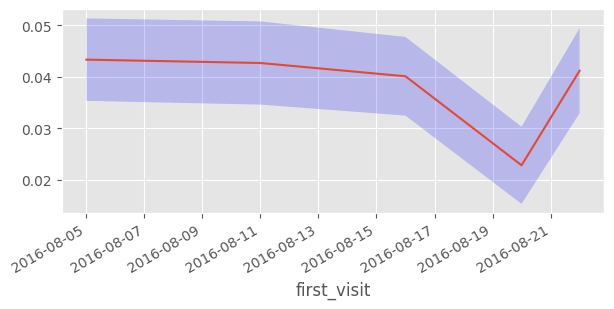

In [16]:
df['retention'].plot(figsize=(7,3))
plt.fill_between(df.index, df['left'], df['right'], facecolor='blue', alpha=0.2, interpolate=True)
plt.show()

#### Вариант 4

In [17]:
data = {'dt':['2016-08-05','2016-08-05','2016-08-05',
              '2016-08-11','2016-08-11','2016-08-11',
              '2016-08-16','2016-08-16','2016-08-16','2016-08-16',
              '2016-08-20','2016-08-20',
              '2016-08-22','2016-08-22','2016-08-22'],
        'transaction_revenue':[150,125,175,
                               75,100,125,
                               50,180,195,50,
                               75,100,
                               150,125,145]}

In [18]:
df = pd.DataFrame(data=data)
df['dt'] = pd.to_datetime(df['dt'])
df['day_month'] = df['dt'].apply(lambda s: s.strftime('%d-%m'))
df.head()

,dt,transaction_revenue,day_month
0,2016-08-05,150,05-08
1,2016-08-05,125,05-08
2,2016-08-05,175,05-08
3,2016-08-11,75,11-08
4,2016-08-11,100,11-08


In [19]:
df_result = (
    df.groupby(['day_month'])['transaction_revenue']
      .agg([('rpu', 'mean'),
            ('count', 'count'),
            ('se', 'std')])
      .reset_index()
)

In [20]:
df_result.head()

,day_month,rpu,count,se
0,05-08,150.00,3,25.000000
1,11-08,100.00,3,25.000000
2,16-08,118.75,4,79.621500
3,20-08,87.50,2,17.677670
4,22-08,140.00,3,13.228757


In [21]:
alpha = 0.05

q = stats.norm.ppf(1 - alpha/2)
df_result['left'] = df_result['rpu'] - q * df_result['se']/np.sqrt(df_result['count'])
df_result['right'] = df_result['rpu'] + q * df_result['se']/np.sqrt(df_result['count'])

df_result.head()

,day_month,rpu,count,se,left,right
0,05-08,150.00,3,25.000000,121.710357,178.289643
1,11-08,100.00,3,25.000000,71.710357,128.289643
2,16-08,118.75,4,79.621500,40.722363,196.777637
3,20-08,87.50,2,17.677670,63.000450,111.999550
4,22-08,140.00,3,13.228757,125.030528,154.969472


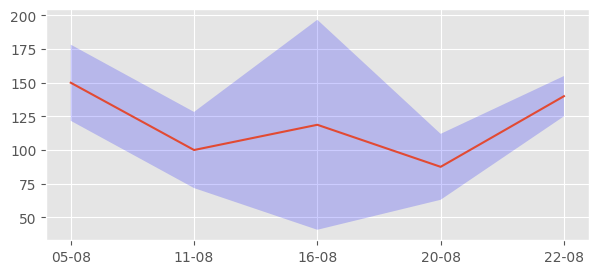

In [22]:
df_result['rpu'].plot(figsize=(7,3))
plt.fill_between(df_result['day_month'], df_result['left'], df_result['right'],
                 facecolor='blue', alpha=0.2, interpolate=True)
plt.show()